# 6. Modelling

Tasks to perform:

6.1. Build Models  
6.2. Evaluate Models  
6.3. Interpret best overall model

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data
songs_df = pd.read_csv('Data/spotify_sg_songs_final_6.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    1629 non-null   object 
 1   popularity                 1629 non-null   float64
 2   title                      1629 non-null   object 
 3   artist                     1629 non-null   object 
 4   album/single               1629 non-null   object 
 5   artist_followers           1629 non-null   int64  
 6   explicit                   1629 non-null   int64  
 7   album                      1629 non-null   object 
 8   release_date               1629 non-null   object 
 9   danceability               1629 non-null   float64
 10  energy                     1629 non-null   float64
 11  key                        1629 non-null   int64  
 12  loudness                   1629 non-null   float64
 13  mode                       1629 non-null   int64

In [3]:
# selecting inputs

x_cols = [col for col in songs_df.columns if '_norm' in col and col !='days_since_release_norm']
x_cols.extend([col for col in songs_df.columns if 'typ' in col])
x_cols.extend(['explicit', 'artist_followers', 'days_since_release'])
x_cols

['artist_followers_norm',
 'danceability_norm',
 'energy_norm',
 'loudness_norm',
 'speechiness_norm',
 'acousticness_norm',
 'instrumentalness_norm',
 'liveness_norm',
 'valence_norm',
 'tempo_norm',
 'duration_ms_norm',
 'mode_norm',
 'topic_weatlh_norm',
 'topic_anger_norm',
 'topic_uncertain_love_norm',
 'topic_hope_norm',
 'topic_sadness_norm',
 'topic_romantic_love_norm',
 'avg_acoustic_typ',
 'avg_topical_typ',
 'explicit',
 'artist_followers',
 'days_since_release']

In [4]:
# select data
target = 'top50_dummy'

model_cols = x_cols[:]
model_cols.append(target)

model_df = songs_df[model_cols]

X = model_df[x_cols]
y = model_df[target]
model_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   artist_followers_norm      1629 non-null   float64
 1   danceability_norm          1629 non-null   float64
 2   energy_norm                1629 non-null   float64
 3   loudness_norm              1629 non-null   float64
 4   speechiness_norm           1629 non-null   float64
 5   acousticness_norm          1629 non-null   float64
 6   instrumentalness_norm      1629 non-null   float64
 7   liveness_norm              1629 non-null   float64
 8   valence_norm               1629 non-null   float64
 9   tempo_norm                 1629 non-null   float64
 10  duration_ms_norm           1629 non-null   float64
 11  mode_norm                  1629 non-null   float64
 12  topic_weatlh_norm          1629 non-null   float64
 13  topic_anger_norm           1629 non-null   float

In [5]:
# check for collinearity
model_df.corr()

artist_followers_norm  danceability_norm  \
artist_followers_norm                   1.000000          -0.032662   
danceability_norm                      -0.032662           1.000000   
energy_norm                             0.001203          -0.007260   
loudness_norm                           0.014966           0.048450   
speechiness_norm                        0.032448           0.233459   
acousticness_norm                      -0.060271          -0.115189   
instrumentalness_norm                  -0.016844          -0.003948   
liveness_norm                          -0.022396          -0.047714   
valence_norm                           -0.083278           0.378682   
tempo_norm                              0.025694          -0.052528   
duration_ms_norm                        0.149425          -0.191747   
mode_norm                              -0.053991          -0.097146   
topic_weatlh_norm                       0.078936           0.205897   
topic_anger_norm                        0.049041           0.082566   
topic_uncertain_love_norm               0.037550          -0.113170   
topic_hope_norm                         0.003049          -0.002443   
topic_sadness_norm                     -0.013443          -0.025669   
topic_romantic_love_norm               -0.101611          -0.065249   
avg_acoustic_typ                       -0.071862           0.235411   
avg_topical_typ                        -0.097998          -0.079876   
explicit                                     NaN                NaN   
artist_followers                        0.727589           0.015688   
days_since_release                      0.048132          -0.168682   
top50_dummy                             0.121305           0.023397   

                           energy_norm  loudness_norm  speechiness_norm  \
artist_followers_norm         0.001203       0.014966          0.032448   
danceability_norm            -0.007260       0.048450          0.233459   
energy_norm                   1.000000       0.729541          0.039292   
loudness_norm                 0.729541       1.000000         -0.041375   
speechiness_norm              0.039292      -0.041375          1.000000   
acousticness_norm            -0.569153      -0.437131         -0.079376   
instrumentalness_norm        -0.012652      -0.104170         -0.037674   
liveness_norm                 0.114449       0.081570          0.009839   
valence_norm                  0.309772       0.274177          0.111602   
tempo_norm                    0.118456       0.072572          0.144641   
duration_ms_norm              0.001930      -0.044056         -0.124745   
mode_norm                    -0.058326      -0.050741         -0.056067   
topic_weatlh_norm             0.001141      -0.002814          0.267968   
topic_anger_norm              0.031143       0.013158          0.069038   
topic_uncertain_love_norm    -0.015376       0.017324         -0.102248   
topic_hope_norm               0.003918       0.006271          0.001678   
topic_sadness_norm           -0.013426      -0.033961         -0.051054   
topic_romantic_love_norm      0.000526      -0.005832         -0.094390   
avg_acoustic_typ              0.490919       0.499978         -0.162978   
avg_topical_typ              -0.008734      -0.003023         -0.105589   
explicit                           NaN            NaN               NaN   
artist_followers             -0.070529      -0.081216          0.052224   
days_since_release            0.108883       0.047809         -0.131968   
top50_dummy                   0.006036      -0.005098         -0.019363   

                           acousticness_norm  instrumentalness_norm  \
artist_followers_norm              -0.060271              -0.016844   
danceability_norm                  -0.115189              -0.003948   
energy_norm                        -0.569153              -0.012652   
loudness_norm                      -0.437131              -0.104170   
speechiness_norm    

In [6]:
model_eval_dfs = []

In [7]:
# model construction
from pycaret.classification import *

# no resampling
clf_none = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            train_size=0.7)
        

In [8]:
top3_none = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [9]:
xgb_none = create_model('xgboost')
xgb_none = tune_model(xgb_none, optimize='F1')
xgb_none_metrics = pull()
xgb_none_df = xgb_none_metrics.iloc[10:11]
xgb_none_df[['model', 'resampling']] = ['xgb', 'none']
model_eval_dfs.append(xgb_none_df)
xgb_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.2956  0.6088  0.9671  0.2489  0.3958  0.0264  0.0874   xgb   

     resampling  
Mean       none

In [10]:
lr_none = create_model('lr')
lr_none = tune_model(lr_none, optimize='F1')
lr_none_metrics = pull()
lr_none_df = lr_none_metrics.iloc[10:11]
lr_none_df[['model', 'resampling']] = ['lr', 'none']
model_eval_dfs.append(lr_none_df)
lr_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.3105  0.5925   0.913  0.2535  0.3884  0.0278  0.0307    lr   

     resampling  
Mean       none

In [11]:
knn_none = create_model('knn')
knn_none = tune_model(knn_none, optimize='F1')
knn_none_metrics = pull()
knn_none_df = knn_none_metrics.iloc[10:11]
knn_none_df[['model', 'resampling']] = ['knn', 'none']
model_eval_dfs.append(knn_none_df)
knn_none_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.7202  0.6028  0.2905  0.3763  0.3249  0.1554  0.1573   knn   

     resampling  
Mean       none

In [12]:
# oversampling with SMOTE
clf_over = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            train_size=0.7)

In [13]:
top3_over = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [14]:
xgb_over = create_model('xgboost')
xgb_over = tune_model(xgb_over, optimize='F1')
xgb_over_metrics = pull()
xgb_over_df = xgb_over_metrics.iloc[10:11]
xgb_over_df[['model', 'resampling']] = ['xgb', 'over']
model_eval_dfs.append(xgb_over_df)
xgb_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.3904  0.5865  0.8639  0.2632  0.4033  0.0594  0.1105   xgb   

     resampling  
Mean       over

In [15]:
lr_over = create_model('lr')
lr_over = tune_model(lr_over, optimize='F1')
lr_over_metrics = pull()
lr_over_df = lr_over_metrics.iloc[10:11]
lr_over_df[['model', 'resampling']] = ['lr', 'over']
model_eval_dfs.append(lr_over_df)
lr_over_df

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC model resampling
Mean    0.2386  0.5954     1.0  0.2386  0.3853    0.0  0.0    lr       over

In [16]:
knn_over = create_model('knn')
knn_over = tune_model(knn_over, optimize='F1')
knn_over_metrics = pull()
knn_over_df = knn_over_metrics.iloc[10:11]
knn_over_df[['model', 'resampling']] = ['knn', 'over']
model_eval_dfs.append(knn_over_df)
knn_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.5851  0.6234  0.5733  0.3046  0.3973  0.1246  0.1392   knn   

     resampling  
Mean       over

In [17]:
from imblearn.under_sampling import *
tomek_links1 = TomekLinks()

# undersampling with Tomek Links
clf_under = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            fix_imbalance_method=tomek_links1, 
            train_size=0.7)

In [18]:
top3_under = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [19]:
xgb_under = create_model('xgboost')
xgb_under = tune_model(xgb_under, optimize='F1')
xgb_under_metrics = pull()
xgb_under_df = xgb_under_metrics.iloc[10:11]
xgb_under_df[['model', 'resampling']] = ['xgb', 'under']
model_eval_dfs.append(xgb_under_df)
xgb_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.5325  0.6166  0.6693  0.2917  0.4053  0.1102  0.1372   xgb   

     resampling  
Mean      under

In [20]:
lr_under = create_model('lr')
lr_under = tune_model(lr_under, optimize='F1')
lr_under_metrics = pull()
lr_under_df = lr_under_metrics.iloc[10:11]
lr_under_df[['model', 'resampling']] = ['lr', 'under']
model_eval_dfs.append(lr_under_df)
lr_under_df

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC model resampling
Mean    0.3421  0.595  0.8889  0.2608  0.3952  0.0436  0.0503    lr      under

In [21]:
knn_under = create_model('knn')
knn_under = tune_model(knn_under, optimize='F1')
knn_under_metrics = pull()
knn_under_df = knn_under_metrics.iloc[10:11]
knn_under_df[['model', 'resampling']] = ['knn', 'under']
model_eval_dfs.append(knn_under_df)
knn_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.6623  0.5997  0.3787  0.3229  0.3457  0.1213  0.1234   knn   

     resampling  
Mean      under

In [22]:
# combine all evaluation metrics

model_metrics_df = pd.concat(model_eval_dfs)
model_metrics_df = model_metrics_df.sort_values(by='F1', ascending=False)
model_metrics_df.to_csv('Data/model_metrics.csv')
model_metrics_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.5325  0.6166  0.6693  0.2917  0.4053  0.1102  0.1372   xgb   
Mean    0.3904  0.5865  0.8639  0.2632  0.4033  0.0594  0.1105   xgb   
Mean    0.5851  0.6234  0.5733  0.3046  0.3973  0.1246  0.1392   knn   
Mean    0.2956  0.6088  0.9671  0.2489  0.3958  0.0264  0.0874   xgb   
Mean    0.3421  0.5950  0.8889  0.2608  0.3952  0.0436  0.0503    lr   
Mean    0.3105  0.5925  0.9130  0.2535  0.3884  0.0278  0.0307    lr   
Mean    0.2386  0.5954  1.0000  0.2386  0.3853  0.0000  0.0000    lr   
Mean    0.6623  0.5997  0.3787  0.3229  0.3457  0.1213  0.1234   knn   
Mean    0.7202  0.6028  0.2905  0.3763  0.3249  0.1554  0.1573   knn   

     resampling  
Mean      under  
Mean       over  
Mean       over  
Mean       none  
Mean      under  
Mean       none  
Mean       over  
Mean      under  
Mean       none

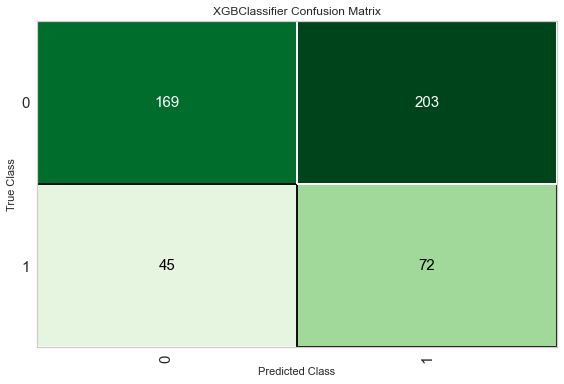

In [23]:
# best model confusion matrix
plot_model(xgb_under, 'confusion_matrix')

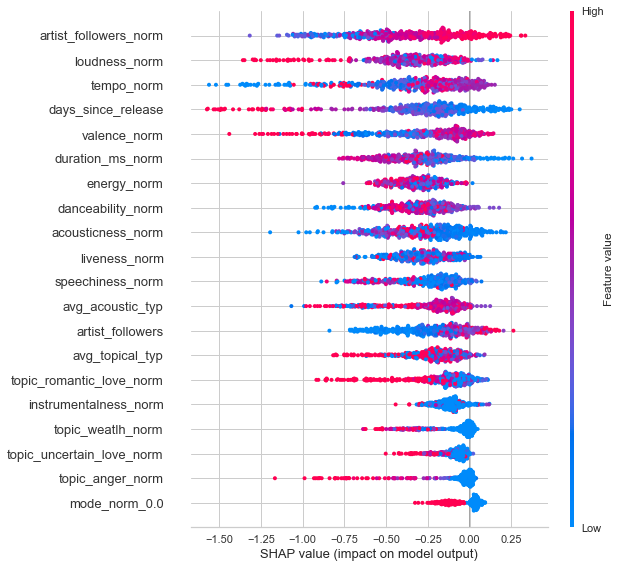

In [24]:
# best model SHAP values
interpret_model(xgb_under)